# MSE1065
## Lab 8- Defect Prediction


### Load Dependencies

In [2]:
# Base python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn packages - model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#sklearn models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

#sklearn packages - metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Part 1
### Load Data

In [3]:
### load data
#read csv
df = pd.read_csv('data.csv')

#get head
df.head()

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.1
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.9
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.7
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5


### Prep and clean data

* split into x and y arrays
* Check for missing values
* normalize x values to zero mean and unit variance
* train/test split

In [4]:
# break df into x and y numpy arrays
df_y = df.TCL.values
df_x = df.drop(['TCL', 'No.'], axis = 1).values


# are the two arrays the correct shape?
print(df_x.shape, df_y.shape)

# Any missing values?
print('The number of missing x values is:', np.count_nonzero(np.isnan(df_x)))
print('The number of missing y values is:', np.count_nonzero(np.isnan(df_y)))

(487, 21) (487,)
The number of missing x values is: 0
The number of missing y values is: 0


In [5]:
#Normalize feature data

normX = (df_x - df_x.mean(axis = 0)) / df_x.std(axis = 0)


#check our work. Variance should be one and mean should be ~0
print(normX.mean(axis = 0), normX.var(axis = 0))

[-2.91803998e-17  5.83607997e-17  5.10656997e-17 -8.75411995e-17
 -1.60492199e-16 -8.75411995e-16 -2.91803998e-16 -6.56558996e-17
 -1.45901999e-17  7.29509996e-17  2.91803998e-17 -1.16721599e-16
  7.29509996e-17 -2.91803998e-17  5.83607997e-17  1.16721599e-16
 -8.75411995e-17  1.02131399e-16 -3.79345198e-16 -2.62623598e-16
  2.11557899e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(normX, df_y, test_size = 0.2, random_state = 1)

## Part 2a: Linear Regression

In [7]:
# fit linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)

#get prediction arrays for train and test data sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#MAE values
print('The train MAE is: %0.2f' % mean_absolute_error(y_train, y_train_pred))
print('The test MAE is: %0.2f' % mean_absolute_error(y_test, y_test_pred))

#RMSE values
#MAE values
print('The train RMSE is: %0.2f' % mean_squared_error(y_train, y_train_pred))
print('The test RMSE is: %0.2f' % mean_squared_error(y_test, y_test_pred))

The train MAE is: 3.81
The test MAE is: 4.65
The train RMSE is: 22.02
The test RMSE is: 34.10


## Part 2b: Ridge Regression

In [8]:
# alpha values
alphas = [0.01, 0.1, 1.5, 2.0, 5.0]

for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=False).fit(X_train, y_train)
    #get prediction arrays for train and test data sets
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)

    print('  ')
    print('The alpha value used in this regression is', a)
    
    #MAE values
    print('The train MAE at alpha of  is: %0.3f' % mean_absolute_error(y_train, y_train_pred))
    print('The test MAE is: %0.3f' % mean_absolute_error(y_test, y_test_pred))

    #RMSE values
    #MAE values
    print('The train RMSE is: %0.3f' % mean_squared_error(y_train, y_train_pred))
    print('The test RMSE is: %0.3f' % mean_squared_error(y_test, y_test_pred))
    
    #R^2 values
    print('The train R^2 is: %0.2f' % r2_score(y_train, y_train_pred))
    print('The test R^2 is: %0.2f' % r2_score(y_test, y_test_pred))

  
The alpha value used in this regression is 0.01
The train MAE at alpha of  is: 3.806
The test MAE is: 4.651
The train RMSE is: 22.017
The test RMSE is: 34.096
The train R^2 is: -0.39
The test R^2 is: -0.45
  
The alpha value used in this regression is 0.1
The train MAE at alpha of  is: 3.806
The test MAE is: 4.651
The train RMSE is: 22.017
The test RMSE is: 34.094
The train R^2 is: -0.39
The test R^2 is: -0.45
  
The alpha value used in this regression is 1.5
The train MAE at alpha of  is: 3.805
The test MAE is: 4.648
The train RMSE is: 22.019
The test RMSE is: 34.075
The train R^2 is: -0.39
The test R^2 is: -0.45
  
The alpha value used in this regression is 2.0
The train MAE at alpha of  is: 3.805
The test MAE is: 4.647
The train RMSE is: 22.020
The test RMSE is: 34.070
The train R^2 is: -0.39
The test R^2 is: -0.45
  
The alpha value used in this regression is 5.0
The train MAE at alpha of  is: 3.803
The test MAE is: 4.644
The train RMSE is: 22.033
The test RMSE is: 34.048
The tr

## Part 2b Comment

For the values of alpha suggested, the coefficients are relatively constant and every similar to the least squares regression model. Only as the alpha value is increased to large values (i.e. 10) does the model start to reduce the coefficients towards zero. From the results of alphas, the MAE and RMSE is relatively unchanging across the number of alphas selected, though an alpha value of 5 gives a slightly better training RMSE

## Part 2c: Plotting True and Predicted Y values

Text(0, 0.5, 'Predicted Test Y Values')

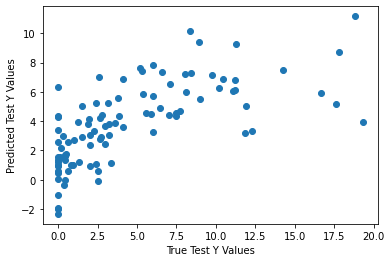

In [54]:

ridge = Ridge(alpha = 5).fit(X_train, y_train)
#get prediction arrays for train and test data sets
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.xlabel('True Test Y Values')
plt.ylabel('Predicted Test Y Values')

## Part 3a: Fitting a neural network

In [67]:
#define model and fit data
mlp = MLPRegressor(hidden_layer_sizes= (6, 6), \
                  max_iter= 1000).fit(X_train, y_train)

#Generate Predicted data set
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

#MAE values
print('The train MAE is: %0.2f' % mean_absolute_error(y_train, y_train_pred))
print('The test MAE is: %0.2f' % mean_absolute_error(y_test, y_test_pred))

#RMSE values
print('The train RMSE is: %0.2f' % mean_squared_error(y_train, y_train_pred))
print('The test RMSE is: %0.2f' % mean_squared_error(y_test, y_test_pred))

#R^2 values
print('The train R^2 is: %0.2f' % r2_score(y_train, y_train_pred))
print('The test R^2 is: %0.2f' % r2_score(y_test, y_test_pred))

The train MAE is: 1.13
The test MAE is: 1.73
The train RMSE is: 2.77
The test RMSE is: 7.42
The train R^2 is: 0.82
The test R^2 is: 0.68


C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Part 3a- Comment

Considering both MAE and RMSE, the neural network fits the data much better. By inspection, it can be seen in the plot in Part 2c that a the true and predicted y-values depart from linearity, suggesting linear models may be inappropiate and a more flexible model is needed

## Part 3b: optional 1

In [69]:
#define model and fit data
mlp = MLPRegressor(hidden_layer_sizes= (6, 6, 3), \
                  max_iter= 1000).fit(X_train, y_train)

#Generate Predicted data set
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

#MAE values
print('The train MAE is: %0.2f' % mean_absolute_error(y_train, y_train_pred))
print('The test MAE is: %0.2f' % mean_absolute_error(y_test, y_test_pred))

#RMSE values
print('The train RMSE is: %0.2f' % mean_squared_error(y_train, y_train_pred))
print('The test RMSE is: %0.2f' % mean_squared_error(y_test, y_test_pred))

#R^2 values
print('The train R^2 is: %0.2f' % r2_score(y_train, y_train_pred))
print('The test R^2 is: %0.2f' % r2_score(y_test, y_test_pred))

The train MAE is: 1.13
The test MAE is: 1.94
The train RMSE is: 2.48
The test RMSE is: 8.17
The train R^2 is: 0.84
The test R^2 is: 0.65


C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Part 3b- Comment

The extra hidden layer leads for overfitting - training error drops, but test error rises

## Part 3c: Optional 2 - Grid Search CV

Look at the affect of activation function and alpha value

In [83]:
      
#specify parameters           
parameters = {'activation' : ('tanh', 'relu'), 'alpha': (0.0001, 0.01)}

mlp = MLPRegressor()

clf = GridSearchCV(mlp, parameters)

#fit whole data set that has not been split into train and test
clf.fit(normX, df_y)

C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ian Johnston\Anaconda3\envs\MSE1065\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activati

In [80]:
results = clf.cv_results_

#print results
results

{'mean_fit_time': array([0.49168077, 0.46580453, 0.63442168, 0.65769391]),
 'std_fit_time': array([0.03361945, 0.01637171, 0.04029428, 0.0931882 ]),
 'mean_score_time': array([0.001196  , 0.00159607, 0.00119705, 0.00139527]),
 'std_score_time': array([0.00039979, 0.00079803, 0.0003989 , 0.00048936]),
 'param_activation': masked_array(data=['tanh', 'tanh', 'relu', 'relu'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.0001, 0.01, 0.0001, 0.01],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'tanh', 'alpha': 0.0001},
  {'activation': 'tanh', 'alpha': 0.01},
  {'activation': 'relu', 'alpha': 0.0001},
  {'activation': 'relu', 'alpha': 0.01}],
 'split0_test_score': array([0.20775519, 0.24117168, 0.3843086 , 0.31738219]),
 'split1_test_score': array([0.45227359, 0.43959259, 0.46645444, 0.45053363]),
 'split2_test_score': 

## Part 3c Comment

The best model was activation function of 'relu' and a alpha of '0.0001'

## Part 4: Pick a favorite

Look at Gradient boosting regressor, as it was the method used in our journal presentation

In [9]:
#define model
gbt = GradientBoostingRegressor().fit(X_train, y_train)

#get prediction arrays for train and test data sets
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

#MAE values
print('The train MAE is: %0.2f' % mean_absolute_error(y_train, y_train_pred))
print('The test MAE is: %0.2f' % mean_absolute_error(y_test, y_test_pred))

#RMSE values
#MAE values
print('The train RMSE is: %0.2f' % mean_squared_error(y_train, y_train_pred))
print('The test RMSE is: %0.2f' % mean_squared_error(y_test, y_test_pred))

#R^2 values
print('The train R^2 is: %0.2f' % r2_score(y_train, y_train_pred))
print('The test R^2 is: %0.2f' % r2_score(y_test, y_test_pred))

The train MAE is: 0.81
The test MAE is: 1.56
The train RMSE is: 1.22
The test RMSE is: 5.49
The train R^2 is: 0.92
The test R^2 is: 0.77


## Part 4: Comment

Gradient Boosting Regressor for this data set is an excellent model choice